In [2]:
import pandas as pd

# Replace 'your_file_path.xlsx' with the actual path to your Excel file.
file_path = (r"C:\Users\ASUS\OneDrive\Desktop\bitcoin.xlsx")

# Read the Excel file into a pandas DataFrame.
df = pd.read_excel(file_path)

# Display the first 5 rows of the DataFrame to verify the import.
print(df.head())

                                               image  \
0  https://dylta6p24nxqg.cloudfront.net/images/17...   
1  https://www.thestreet.com/.image/t_share/MjE3O...   
2  https://bitpinas.com/wp-content/uploads/2022/0...   
3  https://dylta6p24nxqg.cloudfront.net/images/17...   
4  https://cdn.sanity.io/images/s3y3vcno/producti...   

                                               title         source  \
0  Bitcoin (BTCUSD) is rising, affected by signif...  Economies.com   
1  Veteran trader takes on billionaire in ASTER v...      TheStreet   
2  [Breaking News] Philippines House Bill 4792 Pr...       BitPinas   
3  The USDCAD gets ready to attack its current re...  Economies.com   
4  Bitcoin (BTC) News: Liquidity Points to $107K ...       CoinDesk   

                   sourceUrl               publishedAt  \
0  https://www.economies.com  2025-09-24T01:48:00.000Z   
1  https://www.thestreet.com  2025-09-24T00:05:08.000Z   
2       https://bitpinas.com  2025-09-24T01:58:00.000Z   
3  h

In [3]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Assuming 'df' is the DataFrame you loaded in the previous step.

# 1. Remove missing rows from the 'title' column
df.dropna(subset=['title'], inplace=True)

# 2. Tokenize the 'title' column
# We apply the word_tokenize function to each entry in the 'title' column.
df['tokenized_title'] = df['title'].apply(word_tokenize)

# 3. Make every text in the 'title' column lowercase
df['lowercase_title'] = df['title'].str.lower()

# 4. Remove special characters
# This will be applied to the 'lowercase_title' for consistency.
# The regular expression '[^a-zA-Z0-9\s]' matches any character that is not a letter, number, or whitespace.
df['no_special_chars_title'] = df['lowercase_title'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

# 5. Remove stopwords
# First, we get the set of English stopwords from NLTK for faster processing.
stop_words = set(stopwords.words('english'))

# We'll tokenize the 'no_special_chars_title' column and then remove the stopwords.
df['no_stopwords_title'] = df['no_special_chars_title'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Display the first 5 rows with the new columns to verify the operations.
print(df.head())

                                               image  \
0  https://dylta6p24nxqg.cloudfront.net/images/17...   
1  https://www.thestreet.com/.image/t_share/MjE3O...   
2  https://bitpinas.com/wp-content/uploads/2022/0...   
3  https://dylta6p24nxqg.cloudfront.net/images/17...   
4  https://cdn.sanity.io/images/s3y3vcno/producti...   

                                               title         source  \
0  Bitcoin (BTCUSD) is rising, affected by signif...  Economies.com   
1  Veteran trader takes on billionaire in ASTER v...      TheStreet   
2  [Breaking News] Philippines House Bill 4792 Pr...       BitPinas   
3  The USDCAD gets ready to attack its current re...  Economies.com   
4  Bitcoin (BTC) News: Liquidity Points to $107K ...       CoinDesk   

                   sourceUrl               publishedAt  \
0  https://www.economies.com  2025-09-24T01:48:00.000Z   
1  https://www.thestreet.com  2025-09-24T00:05:08.000Z   
2       https://bitpinas.com  2025-09-24T01:58:00.000Z   
3  h

In [4]:
# Assuming 'df' is your DataFrame that contains all the original and newly created columns.

# Define the name for your new Excel file.
output_file_path = 'bitcoin1.xlsx'

# Export the DataFrame to a new Excel file.
# The 'index=False' argument is important as it prevents pandas from writing the
# DataFrame index (the row numbers) as a column in the Excel file.
df.to_excel(output_file_path, index=False)

print(f"DataFrame successfully saved to '{output_file_path}'")

DataFrame successfully saved to 'bitcoin1.xlsx'


In [5]:

from textblob import TextBlob

# --- Perform Sentiment Analysis ---

# 1. Calculate Sentiment Score (Polarity)
# The polarity score ranges from -1 (very negative) to 1 (very positive).
# We apply a lambda function to each row in the 'no_stopwords_text' column.
# For each text, it creates a TextBlob object and gets its sentiment polarity.
df['sentiment_score'] = df['no_stopwords_title'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# 2. Create Sentiment Category
# We'll define a function to categorize the sentiment based on the polarity score.
def get_sentiment_category(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply this function to the 'sentiment_score' column to create the new 'sentiment_category' column.
df['sentiment_category'] = df['sentiment_score'].apply(get_sentiment_category)

# Display the first 5 rows with the new sentiment columns to verify the results.
print(df[['no_stopwords_title', 'sentiment_score', 'sentiment_category']].head())


# --- Export the final DataFrame to a new Excel file ---

# Define the name for your new output file.
output_file_with_sentiment = 'bitcoin2.xlsx'

# Export the DataFrame, which now includes all original columns plus the two new sentiment columns.
df.to_excel(output_file_with_sentiment, index=False)

print(f"\nDataFrame with sentiment analysis successfully saved to '{output_file_with_sentiment}'")

                                  no_stopwords_title  sentiment_score  \
0  bitcoin btcusd rising affected significant sup...            0.375   
1  veteran trader takes billionaire aster vs hype...            0.000   
2  breaking news philippines house bill 4792 prop...            0.000   
3  usdcad gets ready attack current resistance an...            0.100   
4  bitcoin btc news liquidity points 107k potenti...            0.000   

  sentiment_category  
0           Positive  
1            Neutral  
2            Neutral  
3           Positive  
4            Neutral  

DataFrame with sentiment analysis successfully saved to 'bitcoin2.xlsx'


(np.float64(-1.0999984772565903),
 np.float64(1.0999956001865883),
 np.float64(-1.0999996597419603),
 np.float64(1.099997181323463))

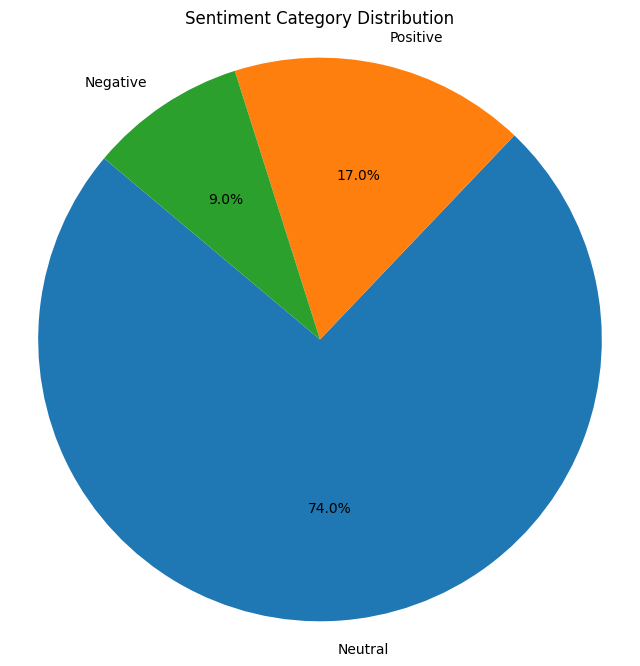

In [6]:
import matplotlib.pyplot as plt


# --- Create the Pie Chart ---

# 1. Count the occurrences of each sentiment category.
# The .value_counts() method returns a Series containing counts of unique values.
sentiment_counts = df['sentiment_category'].value_counts()

# 2. Create the pie chart using the counts and labels.
plt.figure(figsize=(8, 8)) # Optional: Adjusts the size of the figure for better readability.
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)

# 3. Add a title to the chart.
plt.title('Sentiment Category Distribution')

# 4. Ensure the pie chart is a circle.
plt.axis('equal')

# 5. Display the chart.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Ensure there are no missing values in the text column, fill with empty string if any
df['no_stopwords_title'].fillna('', inplace=True)

# --- 1. Vectorize the Text Data ---
# We will convert the text documents into a matrix of TF-IDF features.
# TF-IDF (Term Frequency-Inverse Document Frequency) reflects how important a word is to a document in a collection.
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = vectorizer.fit_transform(df['no_stopwords_title'])

# --- 2. Apply Non-Negative Matrix Factorization (NMF) ---
# We specify the number of topics we want to find.
num_topics = 5

# Create and fit the NMF model
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(tfidf)

# --- 3. Display the Topics ---
# The components_ attribute of the fitted model holds the topic-word matrix.
# We need to get the feature names (words) from our vectorizer to make sense of the topics.
feature_names = vectorizer.get_feature_names_out()

# Function to display the top words for each topic
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        # Print the topic number and the top words
        print(f"Topic #{topic_idx + 1}:")
        # Get the indices of the top words for this topic and reverse them
        top_word_indices = topic.argsort()[::-1][:num_top_words]
        # Join the top words with a space
        top_words = " ".join([feature_names[i] for i in top_word_indices])
        print(top_words)
    print("\n")

# Display the top 10 words for each of the 5 topics
print("Top words for each topic:")
display_topics(nmf_model, feature_names, 10)


# --- 4. (Optional) Assign the dominant topic to each document ---
# Get the document-topic matrix
topic_results = nmf_model.transform(tfidf)

# Find the dominant topic for each document by finding the column with the highest score
df['topic'] = topic_results.argmax(axis=1)

# Display the head of the DataFrame with the new 'topic' column
print("DataFrame with assigned topic for each document:")
print(df[['no_stopwords_title', 'topic']].head())

Top words for each topic:
Topic #1:
bitcoin coinbase big btcusd treasury card cryptocurrency trading mining sets
Topic #2:
price btc prediction bitcoins today investment good news selloff 2030
Topic #3:
crypto amid calls today raise 15 surge future cnbc world
Topic #4:
2025 best xrp trade btc breakout ripple cycle says analyst
Topic #5:
analysis24092025 gets trading witnessing gains gold profittaking price cycle btcusd


DataFrame with assigned topic for each document:
                                  no_stopwords_title  topic
0  bitcoin btcusd rising affected significant sup...      0
1  veteran trader takes billionaire aster vs hype...      2
2  breaking news philippines house bill 4792 prop...      2
3  usdcad gets ready attack current resistance an...      4
4  bitcoin btc news liquidity points 107k potenti...      1


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8732\2509565493.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['no_stopwords_title'].fillna('', inplace=True)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8732\3859024516.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['no_stopwords_title'].fillna('', inplace=True)


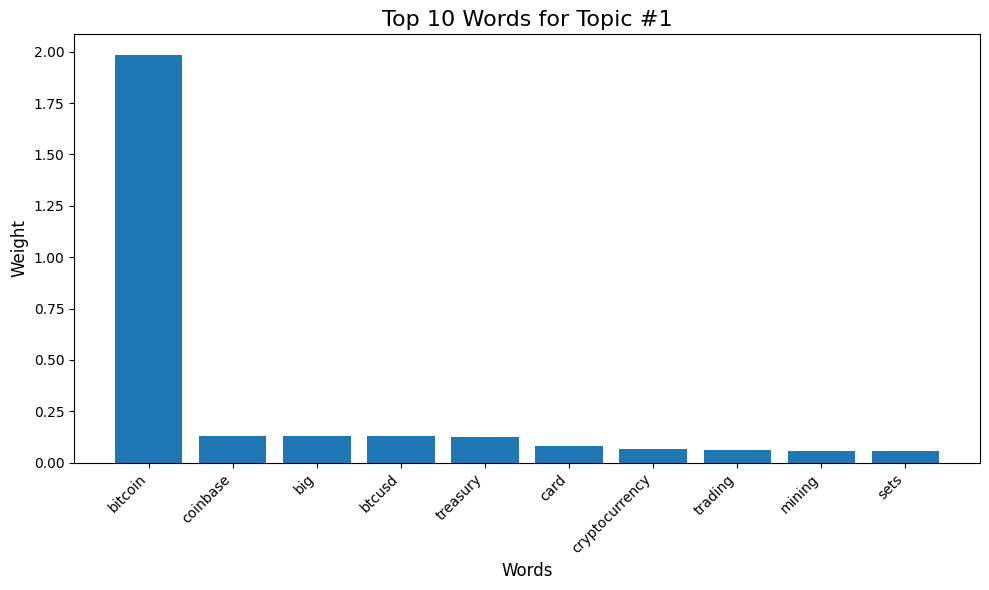

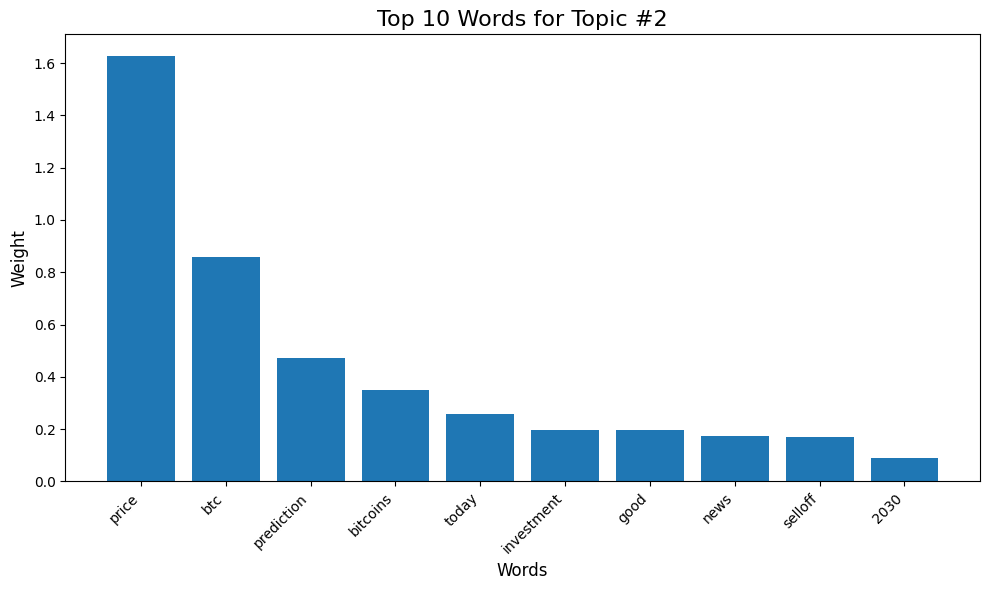

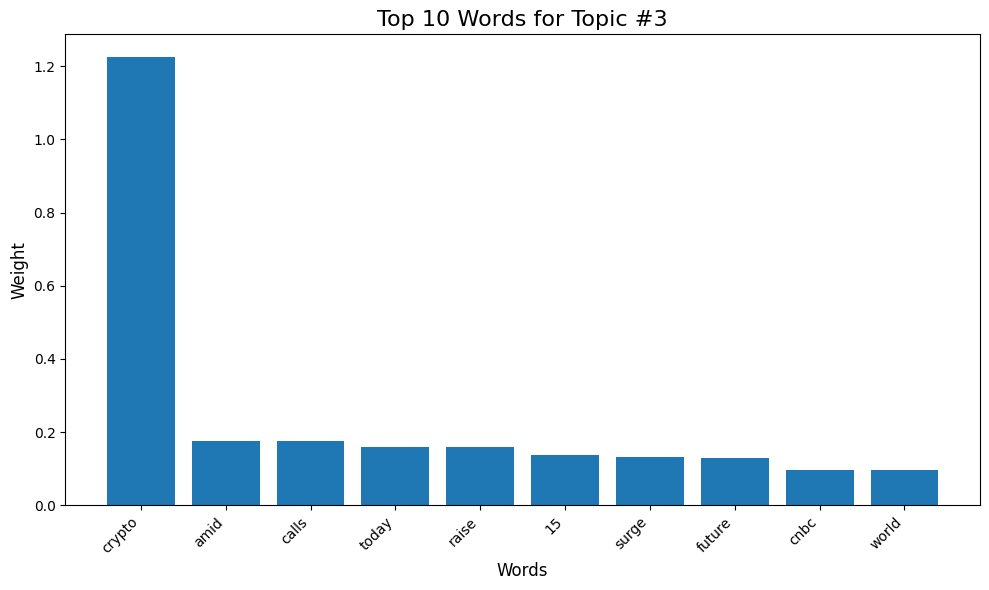

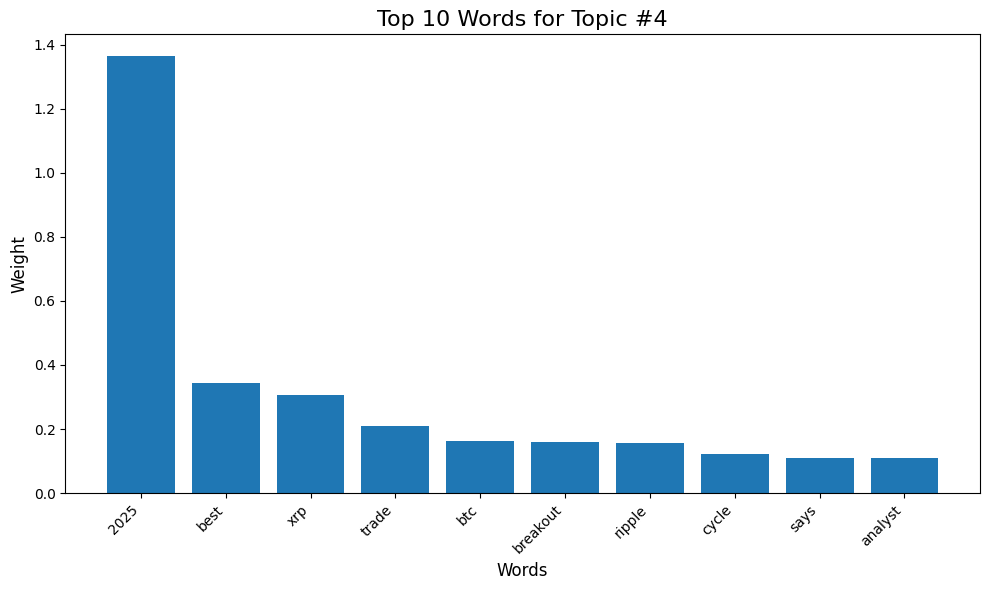

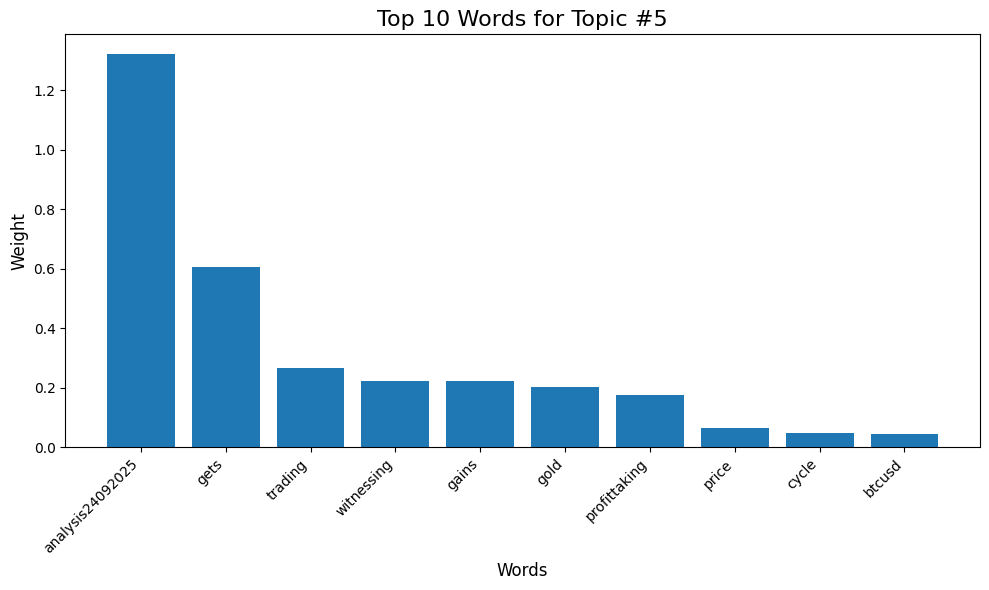

In [11]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Ensure there are no missing values in the text column, fill with empty string if any
df['no_stopwords_title'].fillna('', inplace=True)

# --- 1. Vectorize the Text Data (same as before) ---
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = vectorizer.fit_transform(df['no_stopwords_title'])

# --- 2. Apply NMF (same as before) ---
num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(tfidf)

# --- 3. Generate a Bar Chart for Each Topic ---
feature_names = vectorizer.get_feature_names_out()
num_top_words = 10

# Loop through each topic
for topic_idx, topic in enumerate(nmf_model.components_):
    # Get the top words and their weights for the current topic
    top_word_indices = topic.argsort()[::-1][:num_top_words]
    top_words = [feature_names[i] for i in top_word_indices]
    top_weights = [topic[i] for i in top_word_indices]

    # Create a new figure for each plot
    plt.figure(figsize=(10, 6))
    
    # Create the bar chart
    plt.bar(top_words, top_weights)
    
    # Add titles and labels
    plt.title(f'Top {num_top_words} Words for Topic #{topic_idx + 1}', fontsize=16)
    plt.ylabel('Weight', fontsize=12)
    plt.xlabel('Words', fontsize=12)
    
    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Ensure the layout is tight
    plt.tight_layout()
    
    # Display the plot
    plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8732\2398158603.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['no_stopwords_title'].fillna('', inplace=True)


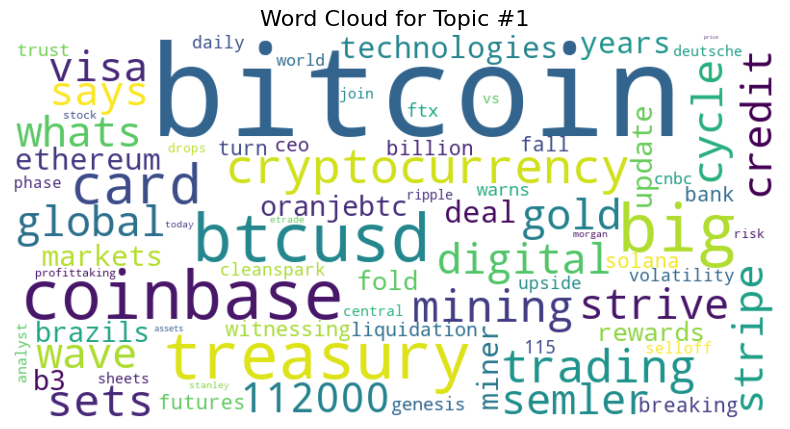

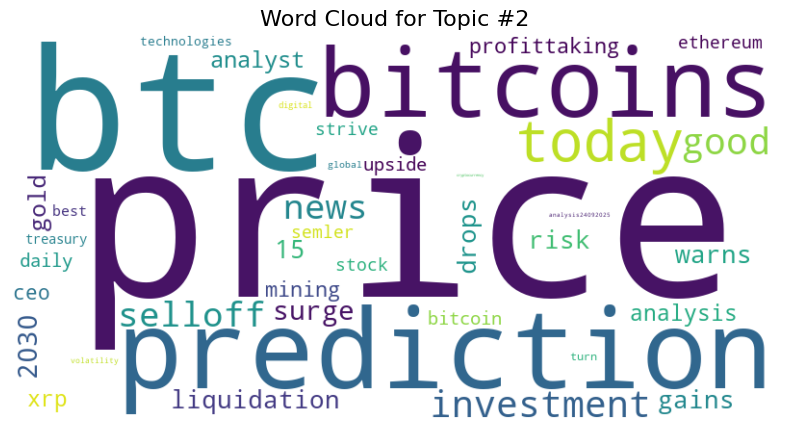

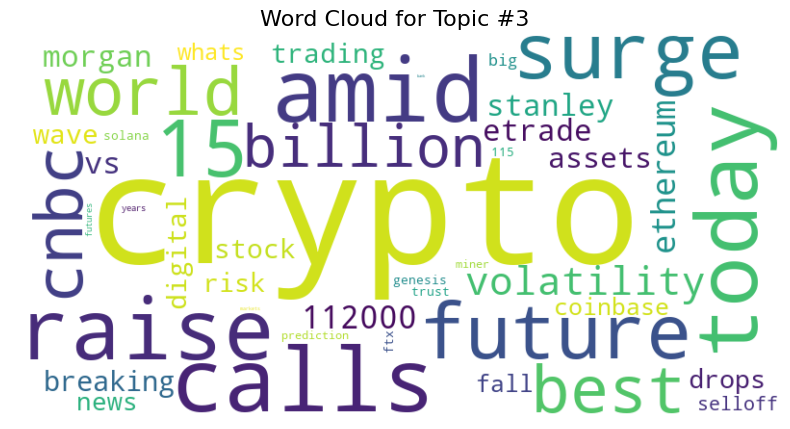

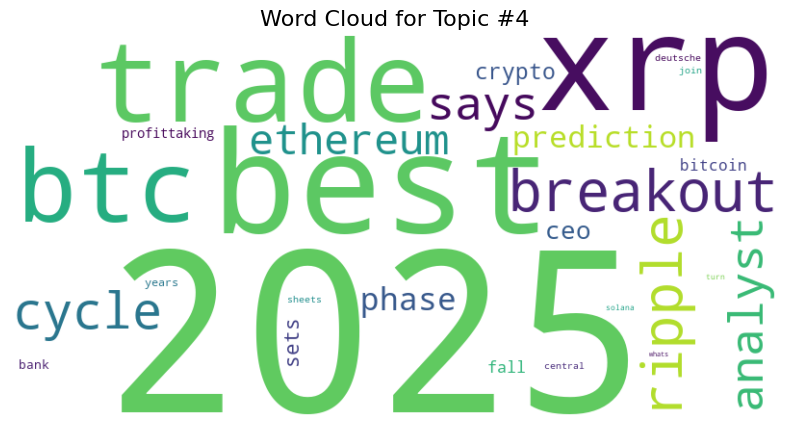

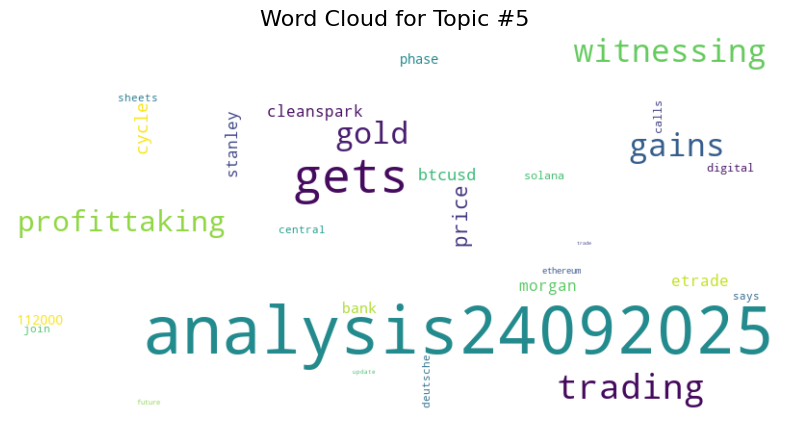

In [10]:
from wordcloud import WordCloud

# Ensure there are no missing values in the text column, fill with empty string if any
df['no_stopwords_title'].fillna('', inplace=True)

# --- 1. Vectorize the Text Data (same as before) ---
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = vectorizer.fit_transform(df['no_stopwords_title'])

# --- 2. Apply NMF (same as before) ---
num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(tfidf)

# --- 3. Generate a Word Cloud for Each Topic ---
feature_names = vectorizer.get_feature_names_out()

# Loop through each topic
for topic_idx, topic in enumerate(nmf_model.components_):
    # Create a dictionary of words and their weights for the current topic
    # The WordCloud object expects a dictionary of {word: frequency}.
    topic_words = {feature_names[i]: topic[i] for i in topic.argsort()[::-1]}

    # Create the WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)

    # Plot the WordCloud image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Topic #{topic_idx + 1}', fontsize=16)
    plt.axis('off') # Don't show the axes
    plt.show()

In [18]:
from collections import Counter
import re

# 🔹 Check your column names first
print(df.columns)   # <-- See the exact column name in your DataFrame

# 🔹 Use the correct column name here (replace 'title' if needed)
all_words = ' '.join(df['title'].dropna()).split()

# ---------------- Bigrams ----------------
bigrams_list = [tuple(all_words[i:i+2]) for i in range(len(all_words) - 1)]
bigram_freq = Counter(bigrams_list)

# ---------------- Trigrams ----------------
trigrams_list = [tuple(all_words[i:i+3]) for i in range(len(all_words) - 2)]
trigram_freq = Counter(trigrams_list)

# ---------------- Display Results ----------------
print("--- Bigram Frequencies ---")
for bg, freq in bigram_freq.most_common(20):
    print(f"{' '.join(bg)}: {freq}")

print("\n--- Trigram Frequencies ---")
for tg, freq in trigram_freq.most_common(20):
    print(f"{' '.join(tg)}: {freq}")


Index(['image', 'title', 'source', 'sourceUrl', 'publishedAt', 'link',
       'tokenized_title', 'lowercase_title', 'no_special_chars_title',
       'no_stopwords_title', 'sentiment_score', 'sentiment_category', 'topic'],
      dtype='object')
--- Bigram Frequencies ---
in 2025: 4
Bitcoin Price: 4
Bitcoin (BTCUSD): 3
Analysis-24-09-2025 Bitcoin: 3
Bitcoin Is: 3
Bitcoin Miner: 3
Stripe and: 3
and Visa: 3
(BTCUSD) is: 2
Digital Assets: 2
Bitcoin (BTC): 2
The Best: 2
Best Crypto: 2
CNBC Crypto: 2
Crypto World: 2
Bitcoin could: 2
up to: 2
is witnessing: 2
to the: 2
update for: 2

--- Trigram Frequencies ---
Stripe and Visa: 3
Bitcoin (BTCUSD) is: 2
The Best Crypto: 2
CNBC Crypto World: 2
Bitcoin Miner Genesis: 2
Miner Genesis Digital: 2
a Good Investment?: 2
(BTCUSD) is rising,: 1
is rising, affected: 1
rising, affected by: 1
affected by significant: 1
by significant support-Analysis-24-09-2025: 1
significant support-Analysis-24-09-2025 Veteran: 1
support-Analysis-24-09-2025 Veteran trader